In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from BatchLab import BatchLab
import numpy as np
%matplotlib inline

In [2]:
tend = 0.25
dt = 0.0001
phi=0.5

In [3]:
bl = BatchLab(tend, dt)

In [4]:
C_init=0.0001/3
bl.add_species(element='H2CO3', init_C=0)
bl.add_species(element='HCO3', init_C=0)
bl.add_species(element='CO3', init_C=0)

bl.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])


bl.add_species(element='H2SO4', init_C=0)
bl.add_species(element='HSO4',  init_C=0)
bl.add_species(element='SO4',  init_C=0)

bl.add_acid(species=['H2SO4', 'HSO4', 'SO4'], pKa=[-10, 1.99])

bl.add_species(element='Ca', init_C=0)
bl.add_species(element='CaCO3', init_C=0)
bl.add_species(element='CaSO4', init_C=0)


bl.add_ion(element='Ca', charge=2)

In [5]:
bl.constants['Ks_CaCO3'] = 3.3e-9
bl.constants['Ks_CaSO4'] = 10**-4.58
bl.constants['k_pre'] = 1e-2
bl.constants['k_dis'] = 1e-1

In [6]:
bl.rates['R_pre_CaCO3'] = 'k_pre * (Ca*CO3/Ks_CaCO3-1)'
bl.rates['R_pre_CaSO4'] = 'k_pre * (Ca*SO4/Ks_CaSO4-1)'
bl.rates['R_dis_CaCO3'] = 'k_dis * CaCO3 * (1 - Ca*CO3/Ks_CaCO3)'
bl.rates['R_dis_CaSO4'] = 'k_dis * CaSO4 * (1 - Ca*SO4/Ks_CaSO4)'

In [7]:
bl.dcdt['CaCO3'] = 'R_pre_CaCO3 - R_dis_CaCO3'
bl.dcdt['Ca'] = '-R_pre_CaCO3 + R_dis_CaCO3 - R_pre_CaSO4 + R_dis_CaSO4+1e-1'
bl.dcdt['CO3'] = '-R_pre_CaCO3 + R_dis_CaCO3+0.5e-1'
bl.dcdt['CaSO4'] = 'R_pre_CaSO4 - R_dis_CaSO4'
bl.dcdt['SO4'] = '-R_pre_CaSO4 + R_dis_CaSO4+0.5e-1'

In [8]:
bl.solve()

Simulation started:
	 2017-09-13 17:16:11


Estimated time of the code execution:
	 0h:00m:18s
Will finish approx.:
	 2017-09-13 17:16:30


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


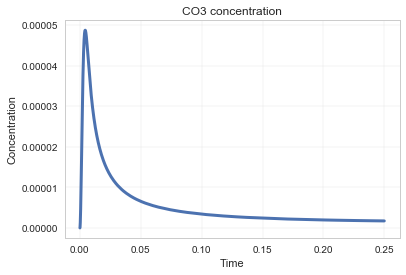

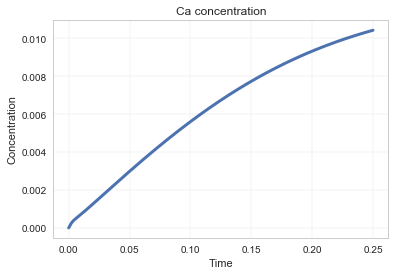

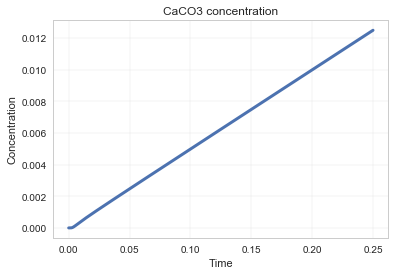

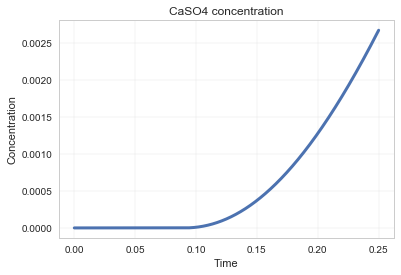

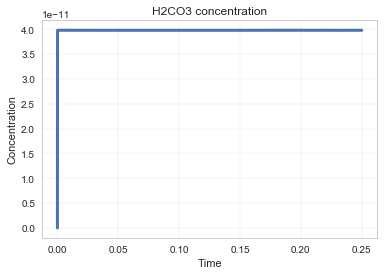

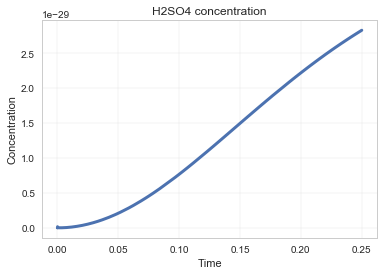

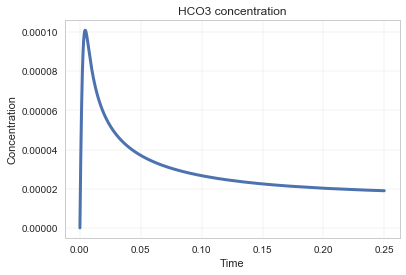

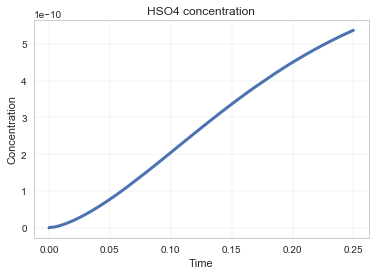

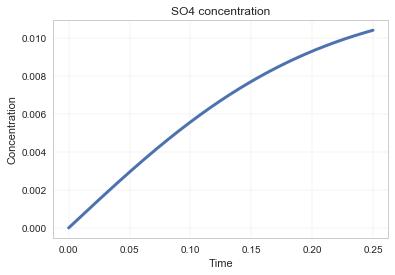

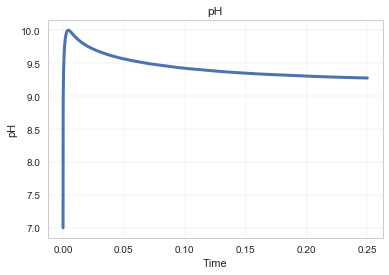

In [9]:
bl.plot_profiles()

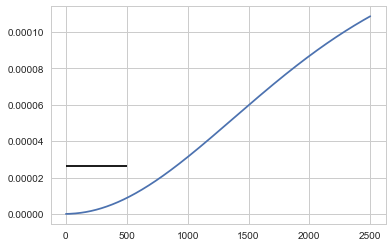

In [10]:
plt.plot(bl.SO4['concentration'][0]*bl.Ca['concentration'][0])
plt.hlines(bl.constants['Ks_CaSO4'], 0, 500)

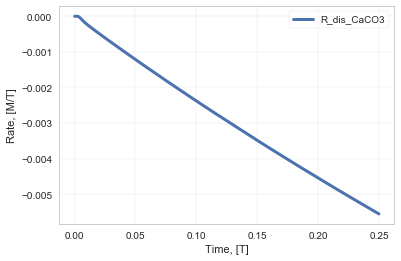

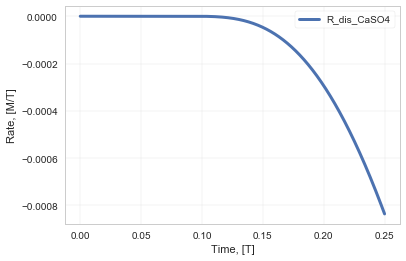

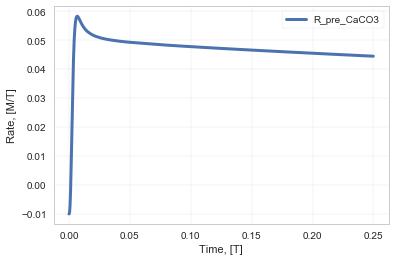

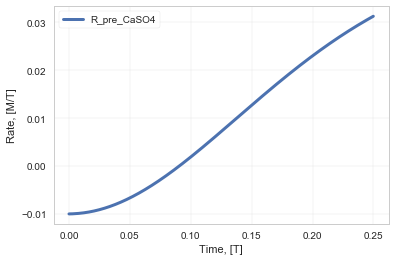

In [11]:
bl.plot_rates()